In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import progeny
import pandas as pd
import scipy.stats
import scanpy_helpers as sh

sc.set_figure_params(figsize=(4, 4))

In [3]:
adata = sc.read_h5ad("../../data/40_cluster_analysis/adata_malignant_b_cells.h5ad")
artifact_dir = "../../data/70_downstream_analyses/cluster_analysis"

In [4]:
!mkdir -p {artifact_dir}

In [5]:
patient_adatas = {
    p: sc.read_h5ad(f"../../data/40_cluster_analysis/adata_{p}.h5ad")
    for p in adata.obs["patient"].unique()
}

# Cluster abundance by timepoint

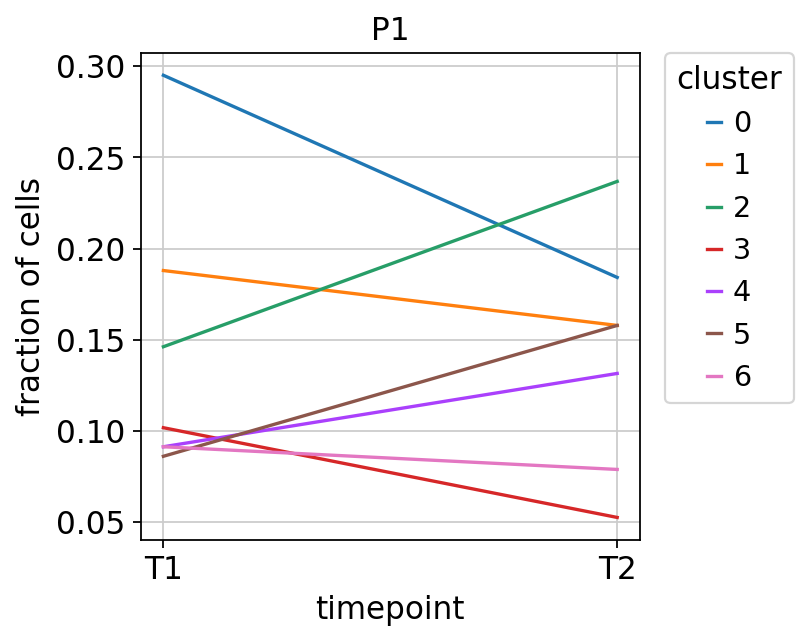

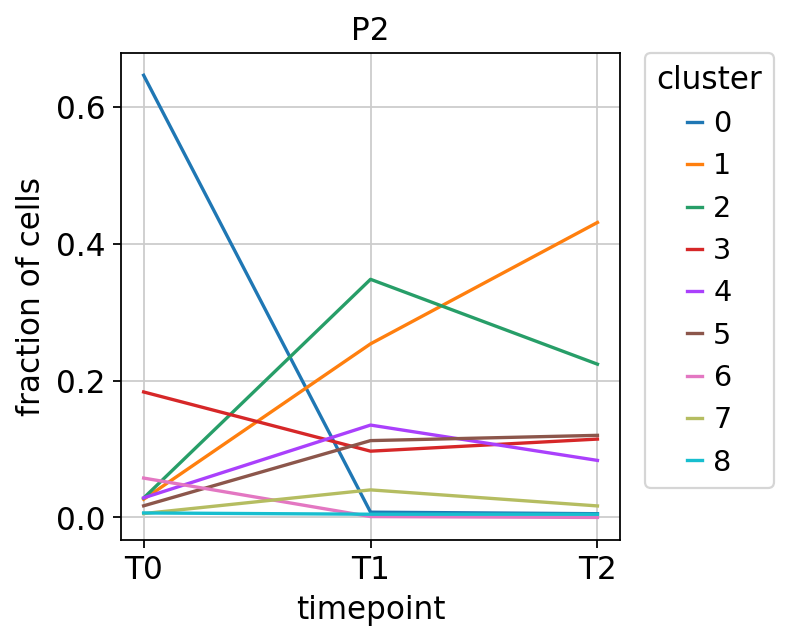

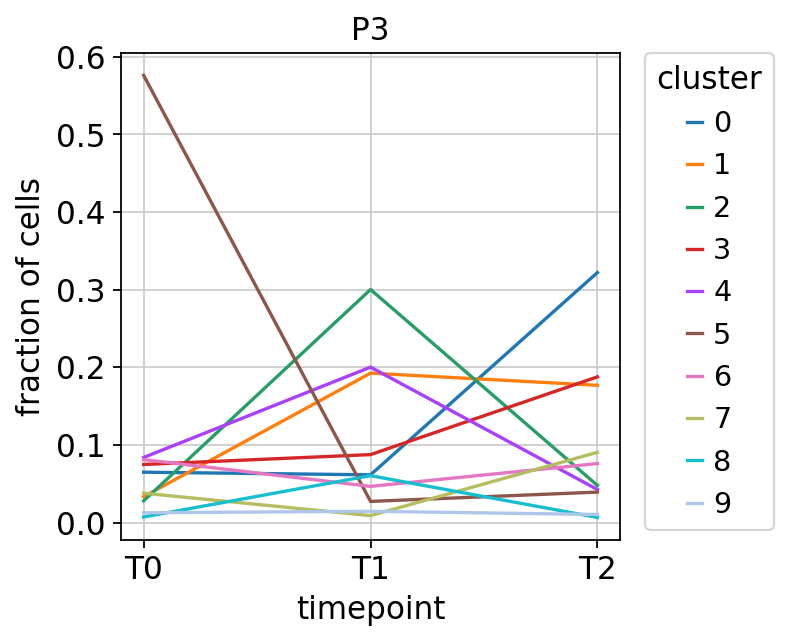

In [6]:
for patient in ["P1", "P2", "P3"]:
    cells_by_timepoint = (
        patient_adatas[patient]
        .obs.groupby(["timepoint", "leiden"])
        .size()
        .reset_index(name="n_cells")
        .groupby(["timepoint"])
        .apply(lambda df: df.assign(n_cells_per_timepoint=np.sum(df["n_cells"])))
        .pipe(
            lambda df: df.assign(frac_cells=df["n_cells"] / df["n_cells_per_timepoint"])
        )
    )
    ax = sns.lineplot(
        data=cells_by_timepoint, x="timepoint", y="frac_cells", hue="leiden"
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0, title="cluster")
    ax.set_ylabel("fraction of cells")
    ax.set_title(patient)
    fig = ax.get_figure()
    fig.savefig(f"{artifact_dir}/cluster_abundance_{patient}.pdf", bbox_inches="tight")
    plt.show()

## single panel

In [7]:
fractions_timepoint = sh.util.cell_type_fractions(
    adata, ["patient", "timepoint", "cell_phenotype"], ["patient", "timepoint"]
)

In [8]:
fractions_timepoint.to_csv(f"{artifact_dir}/fos_jun_fractions_per_timepoint.csv")

In [9]:
fractions_timepoint

,patient,timepoint,cell_phenotype,n_cells,frac_cells
1,P1,T1,fos_malignant_b,33,0.086162
0,P1,T1,malignant_b,350,0.913838
3,P1,T2,fos_malignant_b,6,0.157895
2,P1,T2,malignant_b,32,0.842105
15,P2,T0,fos_malignant_b,282,0.084104
14,P2,T0,malignant_b,3071,0.915896
11,P2,T1,fos_malignant_b,595,0.255036
10,P2,T1,malignant_b,1738,0.744964
13,P2,T2,fos_malignant_b,1024,0.431158
12,P2,T2,malignant_b,1351,0.568842


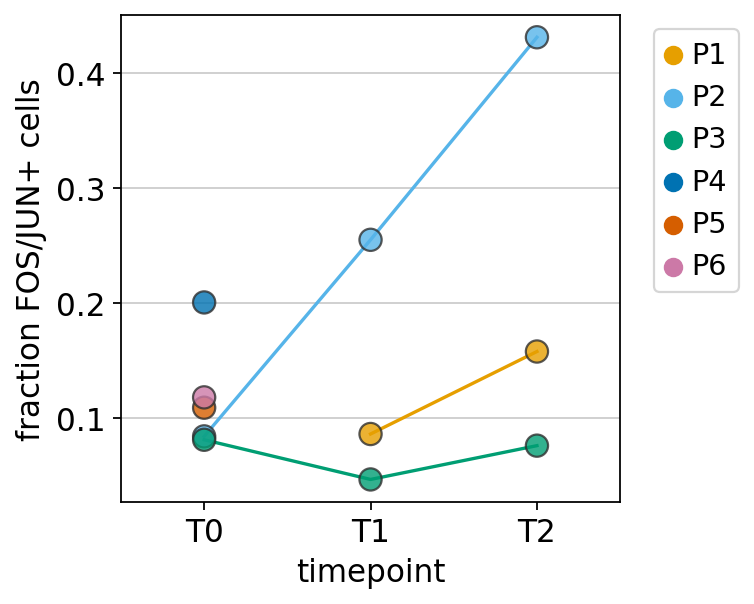

In [14]:
sns.set_palette(sns.color_palette(sh.colors.COLORS.patient.values()))
tmp_df = fractions_timepoint.loc[lambda x: x["cell_phenotype"] == "fos_malignant_b"]
ax = sns.lineplot(
    x="timepoint",
    y="frac_cells",
    data=tmp_df,
    hue="patient",
    legend=False,
)
sns.stripplot(
    x="timepoint",
    y="frac_cells",
    data=tmp_df,
    hue="patient",
    linewidth=1,
    ax=ax,
    size=10,
    jitter=False,
    alpha=0.8,
)
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
ax.set_ylabel("fraction FOS/JUN+ cells")
ax.get_figure().savefig(f"{artifact_dir}/fos_jun_abundance.pdf", bbox_inches="tight")

## fractions per patient

In [11]:
fractions_per_patient = sh.util.cell_type_fractions(adata, ["patient", "cell_phenotype"], ["patient"])

In [12]:
fractions_per_patient

,patient,cell_phenotype,n_cells,frac_cells
1,P1,fos_malignant_b,39,0.092637
0,P1,malignant_b,382,0.907363
5,P2,fos_malignant_b,1901,0.235827
4,P2,malignant_b,6160,0.764173
3,P3,fos_malignant_b,873,0.062806
2,P3,malignant_b,13027,0.937194
7,P4,fos_malignant_b,767,0.200575
6,P4,malignant_b,3057,0.799425
11,P5,fos_malignant_b,577,0.109033
10,P5,malignant_b,4715,0.890967


In [13]:
fractions_timepoint.to_csv(f"{artifact_dir}/fos_jun_fractions_per_patient.csv")